# linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
AlkaliLoadData = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/alkaliData.csv", encoding='unicode_escape')
AlkaliLoadData.head()

,Na2O%,Ms,W/B,SA (m²/kg),Kb,28d
0,4.0,0.75,0.47,527,0.96,43.80
1,4.0,1.00,0.47,527,0.96,48.96
2,4.0,1.50,0.47,527,0.96,48.05
3,4.0,2.00,0.47,527,0.96,33.44
4,6.0,0.75,0.47,527,0.96,46.71


In [3]:
AlkaliLoadData.isnull().sum()

Na2O%         0
Ms            0
W/B           0
SA (m²/kg)    0
Kb            0
28d           0
dtype: int64

In [4]:
X= AlkaliLoadData.drop(columns='28d')
Y = AlkaliLoadData['28d']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_pred_test= lr.predict(X_test) 

In [8]:
from sklearn.metrics import mean_squared_error
linear_mse= mean_squared_error(Y_test, Y_pred_test)
print('mean sq error ', linear_mse)

mean sq error  615.9659862509789


In [9]:
from sklearn.metrics import mean_absolute_error
linear_mae= mean_absolute_error(Y_test, Y_pred_test)
print('mean absolute error is ', linear_mae)

mean absolute error is  18.422998762802095


In [10]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)

0.05043486551714493

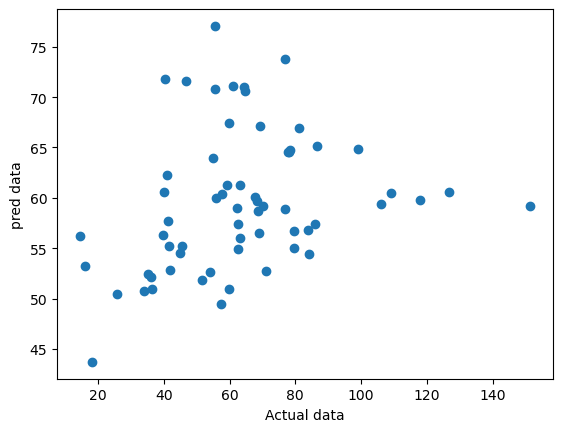

In [84]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()-

# Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [12]:
regression = LinearRegression()
regression.fit(X_train_poly, Y_train)
Y_pred_test_poly= regression.predict(X_test_poly)

In [13]:
poly_mse= mean_squared_error(Y_test, Y_pred_test_poly)
print('mean sq error ', poly_mse)

mean sq error  469.5332160024067


In [14]:
poly_mae= mean_absolute_error(Y_test, Y_pred_test_poly)
print('mean absolute error is ', poly_mae)

mean absolute error is  14.523179980128285


In [15]:
r2_score(Y_test, Y_pred_test_poly)

0.2761737151898065

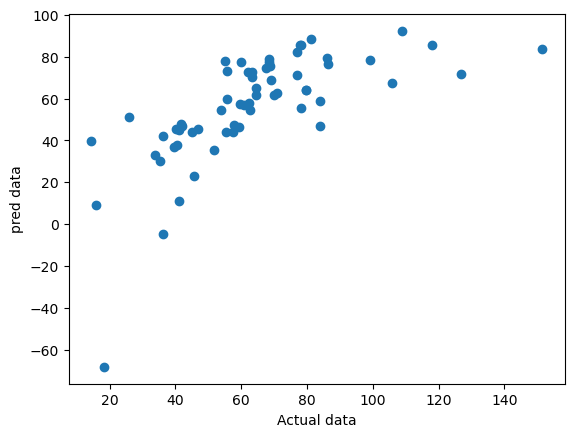

In [85]:
plt.scatter(Y_test, Y_pred_test_poly)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()

# Neural Network

In [16]:
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [20]:
model = Sequential()
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import BatchNormalization
model.add(Dense(5, activation = 'selu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(64, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(32, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(16, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(8, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(4, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(2, activation = 'selu',kernel_initializer=glorot_normal()))

model.add(Dense(1, activation = 'selu',kernel_initializer=glorot_normal()))

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [34]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 125.5264 - mae: 6.7576 - val_loss: 428.6248 - val_mae: 14.8982
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 58.3031 - mae: 5.0207 - val_loss: 421.6309 - val_mae: 14.5471
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 75.1762 - mae: 5.3720 - val_loss: 420.0681 - val_mae: 14.5812
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 80.0898 - mae: 5.5827 - val_loss: 427.8539 - val_mae: 14.6784
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 48.5773 - mae: 4.9484 - val_loss: 426.8102 - val_mae: 14.6387
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 69.6856 - mae: 5.2052 - val_loss: 413.8570 - val_mae: 14.3449
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 69.7628 - mae: 5.9200 - val_loss: 411.0337 - val_mae: 14.3200
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - lo

7/7 [==============================] - 0s 8ms/step - loss: 44.4589 - mae: 4.4012 - val_loss: 421.4271 - val_mae: 14.9095
Epoch 63/100
7/7 [==============================] - 0s 8ms/step - loss: 49.5421 - mae: 4.8953 - val_loss: 426.3220 - val_mae: 14.8899
Epoch 64/100
7/7 [==============================] - 0s 8ms/step - loss: 48.8167 - mae: 4.7979 - val_loss: 422.5982 - val_mae: 14.8305
Epoch 65/100
7/7 [==============================] - 0s 8ms/step - loss: 133.5236 - mae: 6.0489 - val_loss: 421.4093 - val_mae: 14.7777
Epoch 66/100
7/7 [==============================] - 0s 8ms/step - loss: 66.8159 - mae: 5.4812 - val_loss: 437.4384 - val_mae: 15.0784
Epoch 67/100
7/7 [==============================] - 0s 10ms/step - loss: 78.0492 - mae: 5.7756 - val_loss: 439.1093 - val_mae: 15.1641
Epoch 68/100
7/7 [==============================] - 0s 8ms/step - loss: 94.8695 - mae: 5.8657 - val_loss: 417.0322 - val_mae: 14.9350
Epoch 69/100
7/7 [==============================] - 0s 8ms/step - loss: 4

In [35]:
y_pred_neural = model.predict(X_test_scaled)

2/2 [==============================] - 0s 3ms/step


In [36]:
mse_neural= mean_squared_error(Y_test, y_pred_neural)
print('mean sq error ', mse_neural)

mean sq error  206.2505571478551


In [37]:
neural_mae= mean_absolute_error(Y_test, y_pred_neural)
print('mean absolute error is ', neural_mae)

mean absolute error is  10.102706313594695


In [38]:
r2_score(Y_test, y_pred_neural)

0.6820468298464336

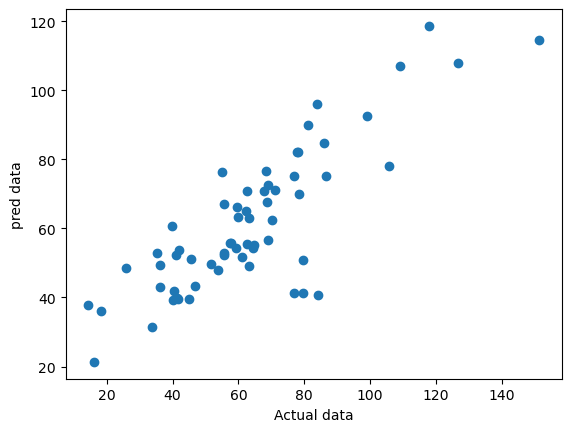

In [86]:
plt.scatter(Y_test, y_pred_neural)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()

# XGBoost

In [39]:
from  xgboost import XGBRegressor

In [79]:
xgbr = XGBRegressor(verbosity=0,learning_rate=0.5,n_estimators=50,max_depth=6,min_child_weight=4)

In [80]:
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=1,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
Yp=xgbr.predict(X_test)
mse_xgboost= mean_squared_error(Y_test, Yp)
print('mean sq error ', mse_xgboost)

mean sq error  115.92043421164789


In [82]:
xgboost_mae= mean_absolute_error(Y_test, Yp)
print('mean absolute error is ', xgboost_mae)

mean absolute error is  7.322312737126504


In [44]:
r2_score(Y_test, Yp)

0.8212985697936832

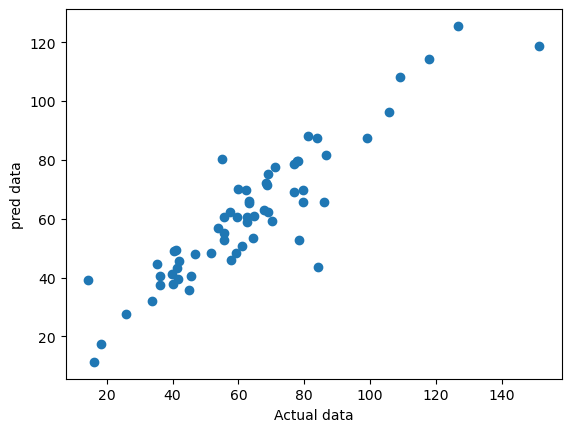

In [87]:
plt.scatter(Y_test, Yp)
plt.xlabel("Actual data")
plt.ylabel("pred data")
plt.show()